***Phase 2/4***

**Data Clustering and Model Building**

**Phase Objective**

This phase aims to group similar areas together using data clustering and build a machine-learning model that predicts ride-request demands based on the clustered data.

Instructions

1. Learn how to use the K-means algorithm to cluster data into groups.

2. Understand how to select and transform features that are relevant for demand forecasting.

3. Gain knowledge on various machine learning algorithms and how to train them.

4. Practice evaluating machine learning models using different techniques.

***1. Load Cleaned Dataset***

In [1]:
import pandas as pd

# Load Phase 1 output
df = pd.read_csv(r"Data\Bengaluru_Ola_Bikes_Cleaned.csv")
df.head()

,Date,Time,Booking ID,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled by Customer,...,Driver Ratings,Customer Rating,Payment Method_Cash,Payment Method_UPI,Payment Method_Unknown,Payment Method_Wallet,Booking Status_Cancelled by Driver,Booking Status_Incomplete,Booking Status_Success,Hour
0,15/01/2024,16:00:00,CNR6875935,301629,0,Area-40,Area-24,10.39,15.75,0,...,4.0,4.0,False,False,True,False,True,False,False,16
1,30/01/2024,22:00:00,CNR9661713,330283,0,Area-41,Area-45,10.39,15.75,0,...,4.0,4.0,False,False,True,False,False,True,False,22
2,30/01/2024,0:00:00,CNR4039598,663054,1,Area-47,Area-8,15.27,23.29,0,...,3.6,3.3,False,True,False,False,False,False,True,0
3,25/01/2024,14:00:00,CNR4781044,785197,1,Area-47,Area-4,19.70,3.85,0,...,3.7,4.7,False,False,False,False,False,False,True,14
4,23/01/2024,21:00:00,CNR4422948,976638,0,Area-4,Area-42,1.28,3.70,0,...,3.5,3.8,False,False,False,True,False,False,True,21


***2. Aggregate Ride Requests (for Forecasting & Area Clustering)***

In [2]:
# Count rides per pickup area per hour
demand_df = df.groupby(['Pickup Location', 'Hour']).size().reset_index(name='Ride Requests')
demand_df.head()

,Pickup Location,Hour,Ride Requests
0,Area-1,0,7
1,Area-1,1,9
2,Area-1,2,10
3,Area-1,3,15
4,Area-1,4,14


***3. Pickup Area Clustering (Demand Profiles)***

*(a) Create 24-hour demand profile per location*

In [3]:
location_demand = demand_df.pivot_table(
    index='Pickup Location',
    columns='Hour',
    values='Ride Requests',
    fill_value=0
)
print(location_demand.shape)
location_demand.head()

(50, 24)


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Pickup Location,,,,,,,,,,,,,,,,,,,,,
Area-1,7.0,9.0,10.0,15.0,14.0,10.0,16.0,14.0,14.0,9.0,...,12.0,6.0,11.0,17.0,12.0,8.0,13.0,21.0,13.0,12.0
Area-10,11.0,19.0,12.0,12.0,16.0,12.0,11.0,15.0,6.0,21.0,...,11.0,10.0,7.0,9.0,15.0,16.0,11.0,9.0,11.0,10.0
Area-11,16.0,8.0,19.0,11.0,8.0,12.0,10.0,12.0,9.0,19.0,...,15.0,10.0,16.0,13.0,12.0,13.0,18.0,12.0,16.0,10.0
Area-12,17.0,17.0,11.0,10.0,12.0,14.0,14.0,17.0,17.0,13.0,...,11.0,13.0,16.0,10.0,14.0,13.0,14.0,10.0,10.0,9.0
Area-13,13.0,12.0,16.0,8.0,13.0,13.0,12.0,4.0,14.0,11.0,...,12.0,17.0,15.0,11.0,7.0,13.0,13.0,12.0,10.0,12.0


*(b) Apply K-Means with Elbow Method*

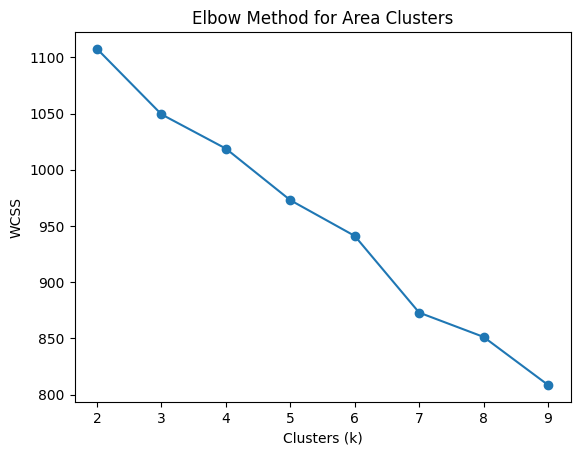

Hour,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Cluster
Pickup Location,,,,,,,,,,,,,,,,,,,,,
Area-1,7.0,9.0,10.0,15.0,14.0,10.0,16.0,14.0,14.0,9.0,...,6.0,11.0,17.0,12.0,8.0,13.0,21.0,13.0,12.0,3
Area-10,11.0,19.0,12.0,12.0,16.0,12.0,11.0,15.0,6.0,21.0,...,10.0,7.0,9.0,15.0,16.0,11.0,9.0,11.0,10.0,1
Area-11,16.0,8.0,19.0,11.0,8.0,12.0,10.0,12.0,9.0,19.0,...,10.0,16.0,13.0,12.0,13.0,18.0,12.0,16.0,10.0,2
Area-12,17.0,17.0,11.0,10.0,12.0,14.0,14.0,17.0,17.0,13.0,...,13.0,16.0,10.0,14.0,13.0,14.0,10.0,10.0,9.0,3
Area-13,13.0,12.0,16.0,8.0,13.0,13.0,12.0,4.0,14.0,11.0,...,17.0,15.0,11.0,7.0,13.0,13.0,12.0,10.0,12.0,1


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(location_demand)

# Elbow method
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel("Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Area Clusters")
plt.show()

# Final clustering (choose k, e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
location_demand['Cluster'] = kmeans.fit_predict(X_scaled)
location_demand.head()

*(c) Merge clusters into demand data*

In [5]:
cluster_map = location_demand['Cluster'].to_dict()
demand_df['Cluster'] = demand_df['Pickup Location'].map(cluster_map)
demand_df.head()

,Pickup Location,Hour,Ride Requests,Cluster
0,Area-1,0,7,3
1,Area-1,1,9,3
2,Area-1,2,10,3
3,Area-1,3,15,3
4,Area-1,4,14,3


***4. Ride Behavior Clustering (Hour + Distance)***

*(a) Select features & scale*

In [6]:
features = df[['Hour', 'Ride Distance']].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

*(b) Apply K-Means*

In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)
features['Cluster'] = kmeans.fit_predict(X_scaled)

*(c) Visualize time + distance clusters*

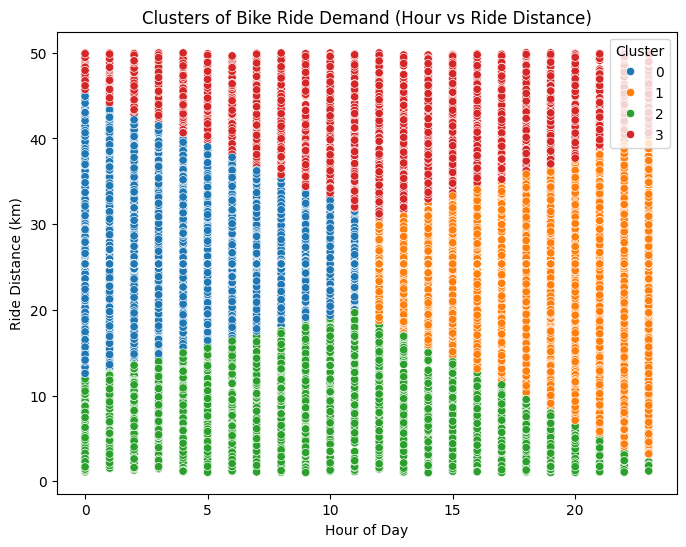

In [8]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=features['Hour'],
    y=features['Ride Distance'],
    hue=features['Cluster'],
    palette="tab10"
)
plt.title("Clusters of Bike Ride Demand (Hour vs Ride Distance)")
plt.xlabel("Hour of Day")
plt.ylabel("Ride Distance (km)")
plt.show()

***5.1 Forecasting Model (Using Area Clusters)***

*(a) Define features and target*

In [9]:
X = demand_df[['Hour', 'Cluster']]
y = demand_df['Ride Requests']

print(X.shape, y.shape)
X.head()


(1200, 2) (1200,)


,Hour,Cluster
0,0,3
1,1,3
2,2,3
3,3,3
4,4,3


*(b) Train models*

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Inspect sample predictions
print("Linear Regression predictions(LR):", y_pred_lr[:5])
print("Random Forest predictions(RF):", y_pred_rf[:5])

Linear Regression predictions(LR): [12.32594718 12.04059028 11.9632899  11.61995771 12.17134643]
Random Forest predictions(RF): [13.96111986 12.53218347 10.0299362  17.50082404 11.76872619]


*(c) Evaluate models*

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import numpy as np

def evaluate(y_true, y_pred, name):
    print(name)
    mse = mean_squared_error(y_true, y_pred)
    print("RMSE:", np.sqrt(mse))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R²:", r2_score(y_true, y_pred))
    print("-"*40)

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")

Linear Regression
RMSE: 3.740403339345837
MAE: 3.079586318418305
R²: 0.004206850519738237
----------------------------------------
Random Forest
RMSE: 3.702251046793972
MAE: 3.0713948855827073
R²: 0.024417522518170975
----------------------------------------


***5.2 Forecasting Model (Hour + Distance)***

*(a) Aggregate rides by hour buckets and distance bins:*

In [12]:
import numpy as np

# Create distance bins (short, medium, long)
df['Distance_Bin'] = pd.cut(df['Ride Distance'], bins=[0,5,10,20,50], labels=['Short','Medium','Long','Very Long'])

# Aggregate demand by hour and distance bin
demand_hd = df.groupby(['Hour', 'Distance_Bin'], observed=True).size().reset_index(name='Ride Requests')
demand_hd.head()

,Hour,Distance_Bin,Ride Requests
0,0,Short,41
1,0,Medium,38
2,0,Long,88
3,0,Very Long,454
4,1,Short,41


*(b) Encode & Define Features*

In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode distance bins
le = LabelEncoder()
demand_hd['Distance_Code'] = le.fit_transform(demand_hd['Distance_Bin'])

X = demand_hd[['Hour','Distance_Code']]
y = demand_hd['Ride Requests']

X.head()


,Hour,Distance_Code
0,0,2
1,0,1
2,0,0
3,0,3
4,1,2


*(c) Train Model*

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_hd = LinearRegression()
lr_hd.fit(X_train, y_train)
y_pred_lr_hd = lr_hd.predict(X_test)

# Random Forest
rf_hd = RandomForestRegressor(random_state=42)
rf_hd.fit(X_train, y_train)
y_pred_rf_hd = rf_hd.predict(X_test)

# Check sample predictions
print("Linear Regression predictions:", y_pred_lr_hd[:5])
print("Random Forest predictions:", y_pred_rf_hd[:5])

Linear Regression predictions: [206.18882959  92.85889244  93.0118628  -21.23589649  94.54156636]
Random Forest predictions: [32.23 41.96 40.28 93.04 42.65]


*(d) Evaluate*

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate(y_true, y_pred, name):
    print(name)
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R²:", r2_score(y_true, y_pred))
    print("-"*40)

evaluate(y_test, y_pred_lr_hd, "Linear Regression (Hour+Distance)")
evaluate(y_test, y_pred_rf_hd, "Random Forest (Hour+Distance)")


Linear Regression (Hour+Distance)
RMSE: 119.23232539395006
MAE: 109.71432447800642
R²: 0.13192299187075185
----------------------------------------
Random Forest (Hour+Distance)
RMSE: 12.788913167271096
MAE: 8.922
R²: 0.9900129435936234
----------------------------------------


***6.1 Visualizations (Area Clusters)***

*(a) Average demand profiles per cluster*

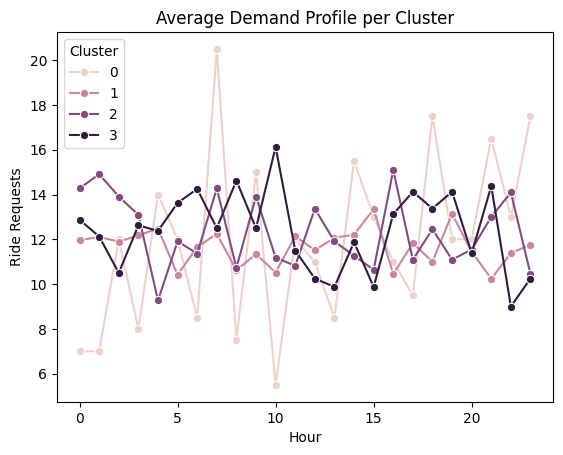

In [16]:
import seaborn as sns

cluster_profiles = demand_df.groupby(['Cluster', 'Hour'])['Ride Requests'].mean().reset_index()
sns.lineplot(data=cluster_profiles, x='Hour', y='Ride Requests', hue='Cluster', marker='o')
plt.title("Average Demand Profile per Cluster")
plt.show()

*(b) Heatmap of demand intensity*

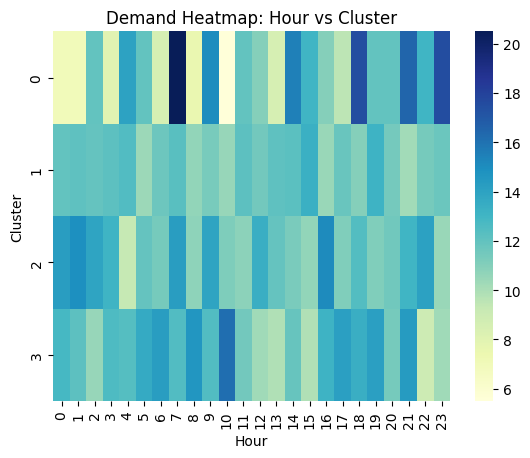

In [17]:
heatmap_data = cluster_profiles.pivot(index="Cluster", columns="Hour", values="Ride Requests")
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("Demand Heatmap: Hour vs Cluster")
plt.show()

*(c) Top pickup locations per cluster*

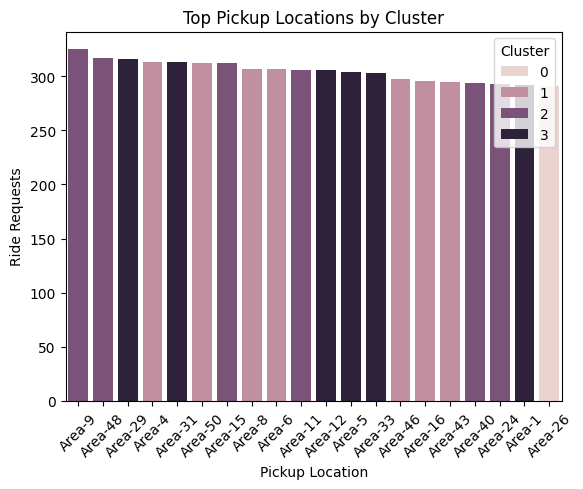

In [18]:
top_locations = demand_df.groupby(['Cluster', 'Pickup Location'])['Ride Requests'].sum().reset_index()
sns.barplot(
    data=top_locations.sort_values('Ride Requests', ascending=False).head(20),
    x='Pickup Location', y='Ride Requests', hue='Cluster'
)
plt.title("Top Pickup Locations by Cluster")
plt.xticks(rotation=45)
plt.show()

***6.2 Visualization (Hour + Distance)***

*(a) Demand Heatmap (Hour vs Distance Bin)*

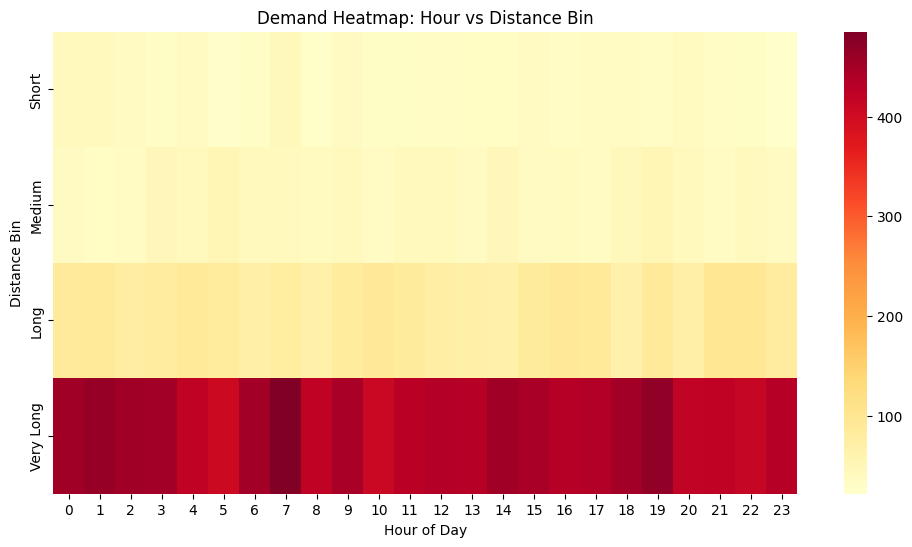

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_hd = demand_hd.pivot(index="Distance_Bin", columns="Hour", values="Ride Requests")

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_hd, cmap="YlOrRd", annot=False)
plt.title("Demand Heatmap: Hour vs Distance Bin")
plt.xlabel("Hour of Day")
plt.ylabel("Distance Bin")
plt.show()

*(b) Line Plot of Average Demand per Distance Bin*

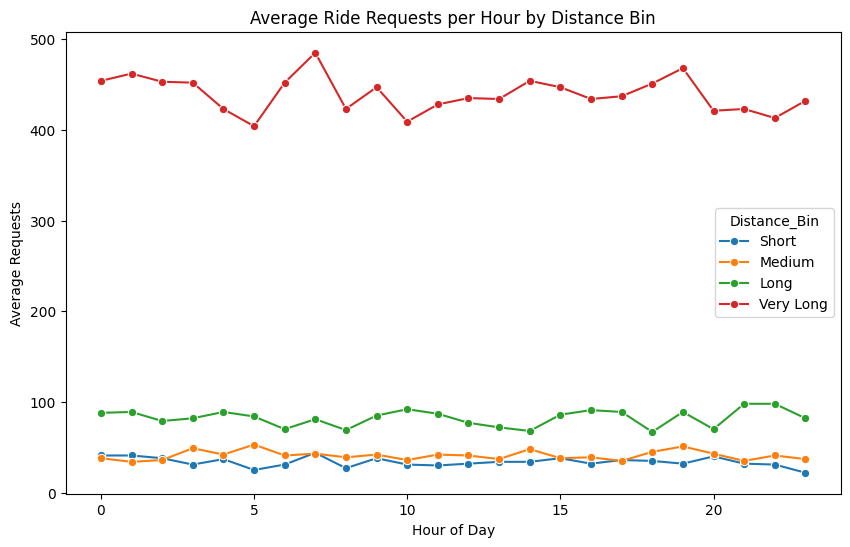

In [20]:
avg_hd = demand_hd.groupby(['Hour', 'Distance_Bin'], observed=True)['Ride Requests'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_hd, x='Hour', y='Ride Requests', hue='Distance_Bin', marker='o')
plt.title("Average Ride Requests per Hour by Distance Bin")
plt.xlabel("Hour of Day")
plt.ylabel("Average Requests")
plt.show()

*(c) Predicted vs Actual (Linear Regression vs Random Forest)*

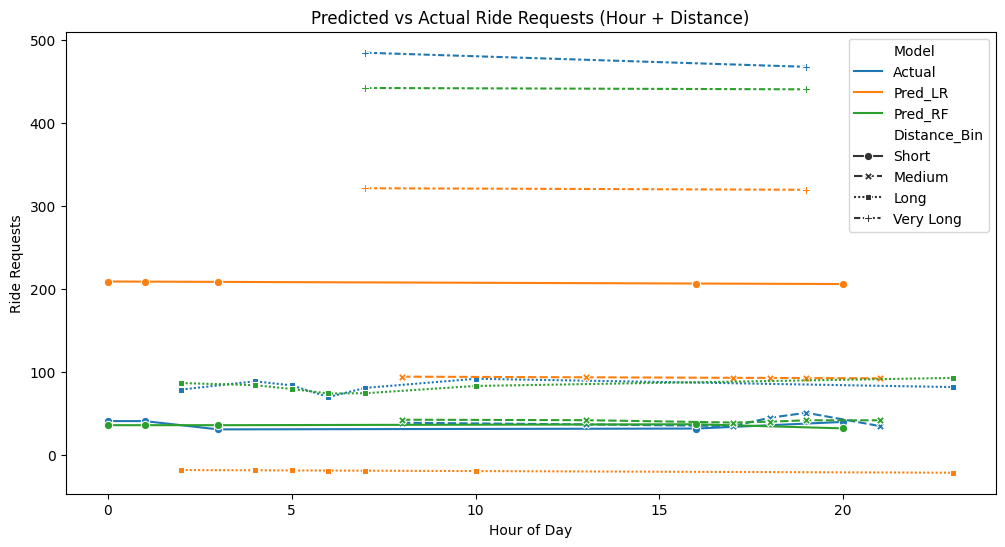

In [21]:
# Create results_hd DataFrame for plotting
results_hd = pd.DataFrame({
    "Hour": y_test.index.map(lambda i: demand_hd.loc[i, "Hour"]),
    "Distance_Bin": y_test.index.map(lambda i: demand_hd.loc[i, "Distance_Bin"]),
    "Actual": y_test.values,
    "Pred_LR": y_pred_lr_hd,
    "Pred_RF": y_pred_rf_hd
})

plot_df = pd.melt(
    results_hd,
    id_vars=["Hour", "Distance_Bin"],
    value_vars=["Actual", "Pred_LR", "Pred_RF"],
    var_name="Model",
    value_name="Ride Requests"
)

plt.figure(figsize=(12,6))
sns.lineplot(
    data=plot_df,
    x="Hour", y="Ride Requests",
    hue="Model", style="Distance_Bin",
    markers=True
)
plt.title("Predicted vs Actual Ride Requests (Hour + Distance)")
plt.xlabel("Hour of Day")
plt.ylabel("Ride Requests")
plt.show()